### Machine Learning - Assignment 2

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import sklearn

C:\Users\Christina\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Christina\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Christina\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


Fashion Mnist dataset contains 70,000 grayscale images in 10 categories. Each image is 28x28. We have in total 60000 images in train set and 10000 images for testing.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape #60000 train images

(60000, 28, 28)

In [5]:
train_labels.shape #with their labels

(60000,)

In [6]:
test_images.shape #10000 test images.

(10000, 28, 28)

### Question 1 : 
Choose randomly 150 images from each category, so in total 150x10 = 1500 images, and this will be the dataset.

In [7]:
all_data = np.concatenate((train_images, test_images)) #merge train and test set data
all_data.shape

(70000, 28, 28)

In [8]:
all_labels= np.concatenate((train_labels, test_labels)) #the same for labels
all_labels.shape

(70000,)

In [9]:
labels= np.unique(train_labels) #we have 10 district labels
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
for i in labels:
    print(np.count_nonzero(all_labels == i))
#there are 7000 items from each category in dataset. 
#I have to choose 150 from 7000 randomly for each of the 10 categories.

7000
7000
7000
7000
7000
7000
7000
7000
7000
7000


In [11]:
indices = np.where(all_labels ==9)[0] #the 7000 indices of dataset which are from category 9(example).
print(indices)
print(indices.shape)

[    0    11    15 ... 69978 69993 69995]
(7000,)


In [12]:
np.random.seed(0) #choose 150 randomly
random_labels=np.random.choice(indices,150)
random_labels

array([27362, 26064, 16200, 32993, 49492, 48718, 58388, 10255, 43823,
       58794, 59218, 67472, 67488, 34940, 64850,  6991, 26010, 21157,
       22060, 29200, 16697,  5286, 29175, 62246, 69193, 60401, 21415,
       51034, 48654, 20292, 18448, 25051, 69964,  1008, 19779,  7535,
        7948,  6637, 32646,  4326, 33666, 27498, 47334,  5361, 67017,
        7095, 22835,  1552, 27249, 66717, 35488, 29499, 11827, 61838,
        8001, 21547, 21547, 19360, 60234, 36176, 35696,  7544, 43767,
       65019, 44786, 16062, 31608, 55771, 67017, 50033, 43632, 54686,
       40918, 40283, 20914, 64614, 39514, 32417, 69214,  4377, 41944,
       60185, 24541, 26613, 15517, 29827, 26830, 41891, 22331, 44299,
       48863, 10610, 47334, 61440, 52874, 50952, 11798, 61276, 39235,
       11432, 16548, 33353, 69336, 27813, 29833, 44644, 59714,  5502,
       54525, 15655, 63383, 58070, 14404, 36698,  2667, 60023, 37542,
       54348, 19344,  8119, 24471, 15902,  9690, 44622, 19974, 29890,
        2014, 24443,

##### Work for all data of all categories with the above way and create the dataset of 1500 points.

In [13]:
my_data=[]
my_labels=[]
for i in labels:
    indices = np.where(all_labels ==i)[0]
    np.random.seed(0)
    random_labels=np.random.choice(indices,150)
    for j in range(len(random_labels)):
        k=0
        my_data.append(all_data[random_labels[j]])
        my_labels.append(all_labels[random_labels[j]])
        k=k+1

In [14]:
my_data=np.array(my_data)
my_labels=np.array(my_labels)

print(my_labels.shape)
print(my_data.shape)

(1500,)
(1500, 28, 28)


In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

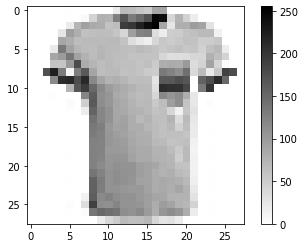

In [16]:
plt.imshow(my_data[0], cmap=plt.cm.binary)
plt.colorbar()

We can see that the pixel values are from 0 to 255. We will scale them in (0,1).

In [17]:
my_data = my_data / 255.0

Take a look at data! We know that the first 150 images are from category 0(T-shirt/top). The next 150 trousers etc..So we shuffle the data randomly:

In [18]:
my_data, my_labels = sklearn.utils.shuffle(my_data, my_labels, random_state=42)

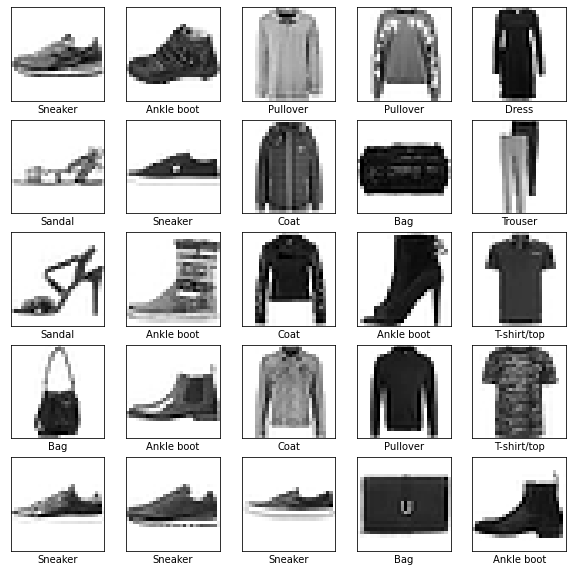

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(my_data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[my_labels[i]])
plt.show()

### Question 2. 
## α)  PCA for M=50,25,10

Choose the right number of dimensions:
First, we need to choose the right number of dimensions (i.e., the right number of principal components). For this, we apply PCA with the original number of dimensions( 784) and create the scree plot to see how well PCA captures the variance of the data.

In [20]:
my_data.shape

(1500, 28, 28)

We flatten the data so each 28x28 images becomes a 784 dim. vector

In [21]:
my_flattened_data=[]
for i in range(my_data.shape[0]):
    my_flattened_data.append(my_data[i].flatten())

In [22]:
my_flattened_data = np.array(my_flattened_data)
my_flattened_data.shape

(1500, 784)

In [30]:
#split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(my_flattened_data,my_labels,test_size=0.2,random_state=123)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1200, 784)
(300, 784)
(1200,)
(300,)


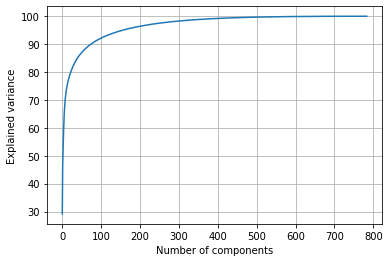

In [35]:
from sklearn.decomposition import PCA

pca_784 = PCA(n_components=784)
pca_784.fit(my_flattened_data)

plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

For the dimension of projection we will try 10,25 and 50. 10 components to compress the image do not capture much of the variability in the original data. So, we will not get a clear image:
#### 10 components:

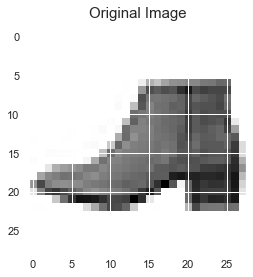

In [251]:
plt.title('Original Image', fontsize=15, pad=15)
plt.imshow(x_train[5].reshape([28,28]), cmap =plt.cm.binary)

Text(0.5, 1.0, 'Image with 10 components')

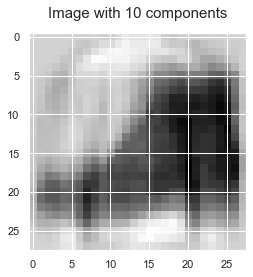

In [250]:
pca_10 = PCA(n_components=10)
mnist_pca_10_reduced_train = pca_10.fit_transform(x_train)
mnist_pca_10_reduced_test = pca_10.fit_transform(x_test)


mnist_pca_10_recovered_train = pca_10.inverse_transform(mnist_pca_10_reduced_train)
mnist_pca_10_recovered_test = pca_10.inverse_transform(mnist_pca_10_reduced_test)


#plot an image to check the results
image_pca_10 = mnist_pca_10_recovered_train[5].reshape([28,28])
plt.imshow(image_pca_10, cmap=plt.cm.binary)
plt.title('Image with 10 components', fontsize=15, pad=15)

We can see that a lot of details are lost. We will try for bigger projection space:

In [44]:
mnist_pca_10_reduced_train.shape

(1200, 10)

#### 25 components

Text(0.5, 1.0, 'Compressed image with 25 components')

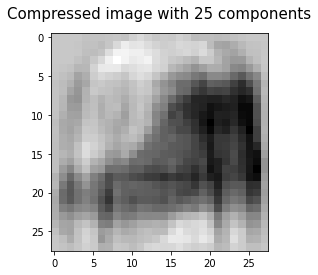

In [45]:
pca_25 = PCA(n_components=25)
mnist_pca_25_reduced_train = pca_25.fit_transform(x_train)
mnist_pca_25_reduced_test = pca_25.fit_transform(x_test)

mnist_pca_25_recovered_train = pca_25.inverse_transform(mnist_pca_25_reduced_train)
mnist_pca_25_recovered_test = pca_25.inverse_transform(mnist_pca_25_reduced_test)

#plot an image to check the results
image_pca_25 = mnist_pca_25_recovered_train[5].reshape([28,28])
plt.imshow(image_pca_25, cmap='gray_r')
plt.title('Compressed image with 25 components', fontsize=15, pad=15)

In [46]:
mnist_pca_25_reduced_train.shape

(1200, 25)

#### 50 components

Text(0.5, 1.0, 'Compressed image with 50 components')

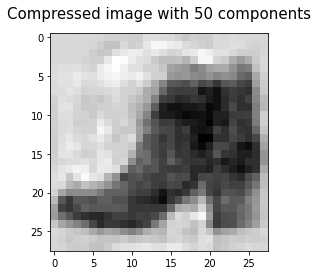

In [47]:
pca_50 = PCA(n_components=50)
mnist_pca_50_reduced_train = pca_50.fit_transform(x_train)
mnist_pca_50_reduced_test = pca_50.fit_transform(x_test)


mnist_pca_50_recovered_train = pca_50.inverse_transform(mnist_pca_50_reduced_train)
mnist_pca_50_recovered_test = pca_50.inverse_transform(mnist_pca_50_reduced_test)

#plot an image to check the results
image_pca_50 = mnist_pca_50_recovered_test[5].reshape([28,28])
plt.imshow(image_pca_50, cmap='gray_r')
plt.title('Compressed image with 50 components', fontsize=15, pad=15)

It seems that with 50 components is better as we expected.

In [48]:
mnist_pca_50_reduced_train.shape

(1200, 50)

## β) Autoencoders

An autoencoder is a neural network that attempts to do 2 things: 
1. First it compress the input data into a lower dimension, 
2. then it tries to use this lower representation of the data to recreate the original input. 
The difference between the original input and the recreation is called reconstruction error. By training the network to minimize this error the network finds an efficient lower represantation. 
1. The first part is the encoder and it's job is to transform the original input into a lower dimensional represantation. 
2. The second part is the decoder, which attempts to recreate the the original input using the output of the encoder, in other words it tries to recreate a higher dimensional thing using a lower dimensional thing.

### 50 dimensions

In [75]:
import keras
from keras import layers

encoding_dim_50 = 50  # 50 dimension

# The input image
input_img_50 = keras.Input(shape=(784,))
#encoded representation of the input
encoded_50 = layers.Dense(encoding_dim_50, activation='relu')(input_img_50)
# reconstruction of the input
decoded_50 = layers.Dense(784, activation='sigmoid')(encoded_50)

# map an input to its reconstruction
autoencoder_50 = keras.Model(input_img_50, decoded_50)

In [76]:
#create a separate encoder model

# map an input to its encoded representation
encoder_50 = keras.Model(input_img_50, encoded_50)

In [77]:
#create a separate decoder model

# The encoded 50-dimensional input
encoded_input_50 = keras.Input(shape=(encoding_dim_50,))
# Retrieve the last layer of the autoencoder model
decoder_layer_50 = autoencoder_50.layers[-1]
# Create the decoder model
decoder_50 = keras.Model(encoded_input_50, decoder_layer_50(encoded_input_50))

In [78]:
#train the autoencoder to reconstruct the images
autoencoder_50.compile(optimizer='adam', loss='binary_crossentropy')

In [79]:
autoencoder_50.fit(x_train, x_train,
                epochs=40,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/40
5/5 [==============================] - 26s 1s/step - loss: 0.6905 - val_loss: 0.6733
Epoch 2/40
5/5 [==============================] - 3s 779ms/step - loss: 0.6644 - val_loss: 0.6280
Epoch 3/40
5/5 [==============================] - 3s 781ms/step - loss: 0.6157 - val_loss: 0.5761
Epoch 4/40
5/5 [==============================] - 5s 1s/step - loss: 0.5655 - val_loss: 0.5349
Epoch 5/40
5/5 [==============================] - 4s 1s/step - loss: 0.5271 - val_loss: 0.5062
Epoch 6/40
5/5 [==============================] - 5s 1s/step - loss: 0.4977 - val_loss: 0.4851
Epoch 7/40
5/5 [==============================] - 4s 1s/step - loss: 0.4769 - val_loss: 0.4664
Epoch 8/40
5/5 [==============================] - 5s 1s/step - loss: 0.4604 - val_loss: 0.4507
Epoch 9/40
5/5 [==============================] - 4s 1s/step - loss: 0.4438 - val_loss: 0.4374
Epoch 10/40
5/5 [==============================] - 5s 1s/step - loss: 0.4291 - val_loss: 0.4263
Epoch 11/40
5/5 [=========================

In [80]:
encoded_imgs_50_train = encoder_50.predict(x_train)
encoded_imgs_50_test = encoder_50.predict(x_test)

decoded_imgs_50_train = decoder_50.predict(encoded_imgs_50_train)
decoded_imgs_50_test = decoder_50.predict(encoded_imgs_50_test)

In [81]:
x_train.shape

(1200, 784)

In [140]:
encoded_imgs_50_train.shape

(1200, 50)

We reduced the dimension of each image from 784 to 50. In encoded_imgs_50_train are saved the train data with dimension 50.

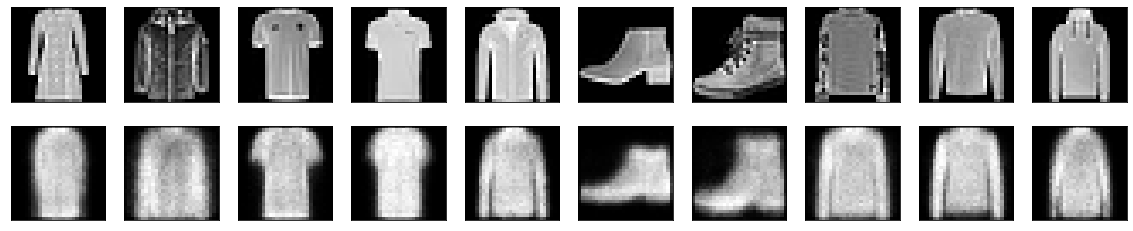

In [83]:
#plotting
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_50_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 25 dimensions

In [84]:
encoding_dim_25 = 25  # 25 dimension

# The input image
input_img_25 = keras.Input(shape=(784,))
#encoded representation of the input
encoded_25 = layers.Dense(encoding_dim_25, activation='relu')(input_img_25)
# reconstruction of the input
decoded_25 = layers.Dense(784, activation='sigmoid')(encoded_25)

# map an input to its reconstruction
autoencoder_25 = keras.Model(input_img_25, decoded_25)

In [85]:
# map an input to its encoded representation
encoder_25 = keras.Model(input_img_25, encoded_25)

In [86]:
# The encoded 25-dimensional input
encoded_input_25 = keras.Input(shape=(encoding_dim_25,))
# Retrieve the last layer of the autoencoder model
decoder_layer_25 = autoencoder_25.layers[-1]
# Create the decoder model
decoder_25 = keras.Model(encoded_input_25, decoder_layer_25(encoded_input_25))

In [87]:
#train the autoencoder to reconstruct the images
autoencoder_25.compile(optimizer='adam', loss='binary_crossentropy')

In [88]:
autoencoder_25.fit(x_train, x_train,
                epochs=40,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/40
5/5 [==============================] - 10s 1s/step - loss: 0.6916 - val_loss: 0.6815
Epoch 2/40
5/5 [==============================] - 4s 901ms/step - loss: 0.6765 - val_loss: 0.6561
Epoch 3/40
5/5 [==============================] - 5s 1s/step - loss: 0.6485 - val_loss: 0.6210
Epoch 4/40
5/5 [==============================] - 5s 1s/step - loss: 0.6122 - val_loss: 0.5846
Epoch 5/40
5/5 [==============================] - 4s 1s/step - loss: 0.5767 - val_loss: 0.5546
Epoch 6/40
5/5 [==============================] - 6s 2s/step - loss: 0.5476 - val_loss: 0.5328
Epoch 7/40
5/5 [==============================] - 6s 1s/step - loss: 0.5291 - val_loss: 0.5172
Epoch 8/40
5/5 [==============================] - 4s 1s/step - loss: 0.5155 - val_loss: 0.5044
Epoch 9/40
5/5 [==============================] - 4s 1s/step - loss: 0.4994 - val_loss: 0.4919
Epoch 10/40
5/5 [==============================] - 6s 1s/step - loss: 0.4888 - val_loss: 0.4795
Epoch 11/40
5/5 [============================

In [89]:
encoded_imgs_25_train = encoder_25.predict(x_train)
encoded_imgs_25_test = encoder_25.predict(x_test)

decoded_imgs_25_train = decoder_25.predict(encoded_imgs_25_train)
decoded_imgs_25_test = decoder_25.predict(encoded_imgs_25_test)

In [90]:
x_train.shape

(1200, 784)

In [91]:
encoded_imgs_25_train.shape

(1200, 25)

In [92]:
y_train.shape

(1200,)

We reduced the dimension of each image from 784 to 25. In encoded_imgs_25_train are saved the train data with dimension 25.

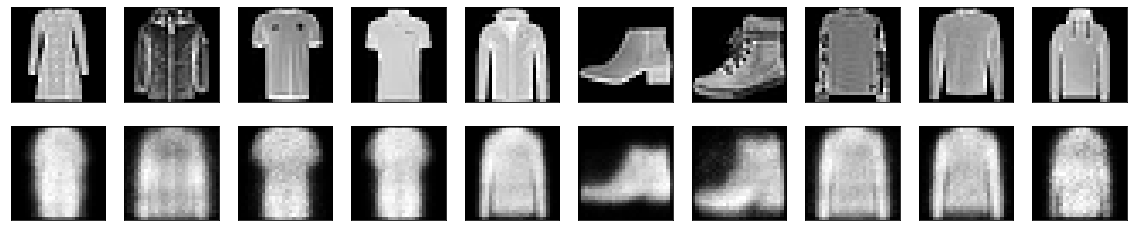

In [93]:
#plotting
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_25_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 10 dimensions

In [94]:
encoding_dim_10 = 10  # 10 dimension

# The input image
input_img_10 = keras.Input(shape=(784,))
#encoded representation of the input
encoded_10 = layers.Dense(encoding_dim_10, activation='relu')(input_img_10)
# reconstruction of the input
decoded_10 = layers.Dense(784, activation='sigmoid')(encoded_10)

# map an input to its reconstruction
autoencoder_10 = keras.Model(input_img_10, decoded_10)

In [95]:
# map an input to its encoded representation
encoder_10 = keras.Model(input_img_10, encoded_10)

In [96]:
# The encoded 25-dimensional input
encoded_input_10 = keras.Input(shape=(encoding_dim_10,))
# Retrieve the last layer of the autoencoder model
decoder_layer_10 = autoencoder_10.layers[-1]
# Create the decoder model
decoder_10 = keras.Model(encoded_input_10, decoder_layer_10(encoded_input_10))

In [97]:
#train the autoencoder to reconstruct the images
autoencoder_10.compile(optimizer='adam', loss='binary_crossentropy')

In [98]:
autoencoder_10.fit(x_train, x_train,
                epochs=40,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/40
5/5 [==============================] - 10s 1s/step - loss: 0.6926 - val_loss: 0.6886
Epoch 2/40
5/5 [==============================] - 5s 1s/step - loss: 0.6864 - val_loss: 0.6770
Epoch 3/40
5/5 [==============================] - 5s 1s/step - loss: 0.6731 - val_loss: 0.6575
Epoch 4/40
5/5 [==============================] - 4s 1s/step - loss: 0.6518 - val_loss: 0.6311
Epoch 5/40
5/5 [==============================] - 4s 1s/step - loss: 0.6249 - val_loss: 0.6013
Epoch 6/40
5/5 [==============================] - 4s 950ms/step - loss: 0.5944 - val_loss: 0.5725
Epoch 7/40
5/5 [==============================] - 4s 917ms/step - loss: 0.5674 - val_loss: 0.5482
Epoch 8/40
5/5 [==============================] - 3s 832ms/step - loss: 0.5428 - val_loss: 0.5301
Epoch 9/40
5/5 [==============================] - 4s 1s/step - loss: 0.5276 - val_loss: 0.5167
Epoch 10/40
5/5 [==============================] - 3s 846ms/step - loss: 0.5141 - val_loss: 0.5060
Epoch 11/40
5/5 [===================

In [99]:
encoded_imgs_10_train = encoder_10.predict(x_train)
encoded_imgs_10_test = encoder_10.predict(x_test)

decoded_imgs_10_train = decoder_10.predict(encoded_imgs_10_train)
decoded_imgs_10_test = decoder_10.predict(encoded_imgs_10_test)

In [100]:
x_train.shape

(1200, 784)

In [101]:
encoded_imgs_10_train.shape

(1200, 10)

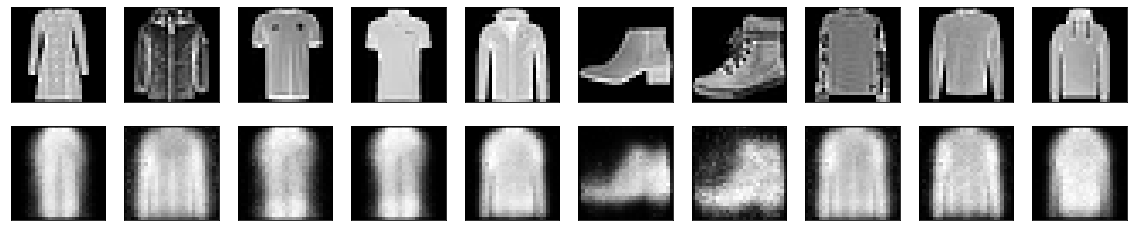

In [103]:
#plotting
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_10_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## γ) KNN for 6 datasets

### pca_10

In [113]:
from sklearn.model_selection import cross_val_score
k_range = range(1, 30)

# list of scores from k_range
k_scores = []
cv = LeaveOneOut()

for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, mnist_pca_10_reduced_train, y_train, cv=cv, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.7475, 0.7141666666666666, 0.7375, 0.735, 0.7475, 0.7375, 0.74, 0.7366666666666667, 0.7433333333333333, 0.7416666666666667, 0.7366666666666667, 0.7375, 0.7425, 0.7341666666666666, 0.73, 0.725, 0.715, 0.7225, 0.7241666666666666, 0.7275, 0.7266666666666667, 0.7283333333333334, 0.7233333333333334, 0.7266666666666667, 0.7275, 0.7258333333333333, 0.7291666666666666, 0.7325, 0.7291666666666666]


I keep the k=1 as it has the biggest accuracy. Let us pick this k value and tain or model.

In [114]:
model = KNeighborsClassifier(n_neighbors=12)
model.fit(mnist_pca_10_reduced_train,y_train)
predictions_pca10 = model.predict(mnist_pca_10_reduced_test)

print(classification_report(y_test,predictions_pca10))
print(accuracy_score(y_test, predictions_pca10))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        30
           1       0.75      0.81      0.78        26
           2       0.48      0.48      0.48        29
           3       0.72      0.72      0.72        32
           4       0.55      0.79      0.65        29
           5       0.71      0.81      0.76        27
           6       0.25      0.13      0.17        30
           7       0.83      0.81      0.82        31
           8       0.87      0.81      0.84        32
           9       0.93      0.82      0.87        34

    accuracy                           0.70       300
   macro avg       0.69      0.70      0.69       300
weighted avg       0.69      0.70      0.69       300

0.7033333333333334


In [125]:
acc_pca10 =accuracy_score(y_test, predictions_pca10)
acc_pca10

0.7033333333333334

### pca_25

In [115]:
k_range = range(1, 30)

# list of scores from k_range
k_scores = []
cv = LeaveOneOut()

for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, mnist_pca_25_reduced_train, y_train, cv=cv, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.7666666666666667, 0.7541666666666667, 0.7725, 0.7833333333333333, 0.77, 0.7758333333333334, 0.775, 0.765, 0.7633333333333333, 0.7608333333333334, 0.7558333333333334, 0.7566666666666667, 0.7525, 0.7525, 0.7583333333333333, 0.7525, 0.7558333333333334, 0.7541666666666667, 0.7491666666666666, 0.7466666666666667, 0.7441666666666666, 0.7458333333333333, 0.7458333333333333, 0.745, 0.7391666666666666, 0.7458333333333333, 0.7408333333333333, 0.7408333333333333, 0.7416666666666667]


I keep the value k=4 as it has the biggest accuracy. Let us pick this k value and tain or model.

In [116]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(mnist_pca_25_reduced_train,y_train)
predictions_pca25 = model.predict(mnist_pca_25_reduced_test)

print(classification_report(y_test,predictions_pca25))
print(accuracy_score(y_test, predictions_pca25))

              precision    recall  f1-score   support

           0       0.58      0.87      0.69        30
           1       0.79      0.85      0.81        26
           2       0.48      0.55      0.52        29
           3       0.65      0.41      0.50        32
           4       0.62      0.79      0.70        29
           5       0.66      0.70      0.68        27
           6       0.41      0.23      0.30        30
           7       0.76      0.81      0.78        31
           8       0.89      0.78      0.83        32
           9       0.97      0.85      0.91        34

    accuracy                           0.68       300
   macro avg       0.68      0.68      0.67       300
weighted avg       0.69      0.68      0.67       300

0.6833333333333333


In [126]:
acc_pca25 =accuracy_score(y_test, predictions_pca25)
acc_pca25

0.6833333333333333

### pca_50

In [117]:
k_range = range(1, 30)

# list of scores from k_range
k_scores = []
cv = LeaveOneOut()

for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, mnist_pca_50_reduced_train, y_train, cv=cv, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.78, 0.7675, 0.79, 0.7808333333333334, 0.7741666666666667, 0.7841666666666667, 0.7791666666666667, 0.7766666666666666, 0.7808333333333334, 0.7816666666666666, 0.7758333333333334, 0.7758333333333334, 0.7741666666666667, 0.7675, 0.7566666666666667, 0.7641666666666667, 0.7675, 0.7708333333333334, 0.76, 0.7558333333333334, 0.7516666666666667, 0.75, 0.7491666666666666, 0.7508333333333334, 0.75, 0.7508333333333334, 0.75, 0.7525, 0.7533333333333333]


I keep the value k=2 as it has the biggest accuracy. Let us pick this k value and tain or model.

In [118]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(mnist_pca_50_reduced_train,y_train)
predictions_pca50 = model.predict(mnist_pca_50_reduced_test)

print(classification_report(y_test,predictions_pca50))
print(accuracy_score(y_test, predictions_pca50))

              precision    recall  f1-score   support

           0       0.54      0.90      0.68        30
           1       0.75      0.81      0.78        26
           2       0.41      0.48      0.44        29
           3       0.53      0.28      0.37        32
           4       0.53      0.79      0.64        29
           5       0.63      0.44      0.52        27
           6       0.33      0.10      0.15        30
           7       0.57      0.87      0.69        31
           8       0.87      0.81      0.84        32
           9       0.96      0.65      0.77        34

    accuracy                           0.61       300
   macro avg       0.61      0.61      0.59       300
weighted avg       0.62      0.61      0.59       300

0.6133333333333333


In [127]:
acc_pca50 =accuracy_score(y_test, predictions_pca50)
acc_pca50

0.6133333333333333

### autoencoder_10

In [119]:
k_range = range(1, 10)

# list of scores from k_range
k_scores = []
cv = LeaveOneOut()

for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, encoded_imgs_10_train, y_train, cv=cv, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.6658333333333334, 0.6525, 0.6783333333333333, 0.655, 0.685, 0.6691666666666667, 0.665, 0.6591666666666667, 0.6683333333333333]


I keep the value k=3 as it has the biggest accuracy. Let us pick this k value and tain or model.

In [120]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(encoded_imgs_10_train,y_train)
predictions_autoencoder10 = model.predict(encoded_imgs_10_test)

print(classification_report(y_test,predictions_autoencoder10))
print(accuracy_score(y_test, predictions_autoencoder10))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        30
           1       0.89      0.92      0.91        26
           2       0.52      0.48      0.50        29
           3       0.59      0.62      0.61        32
           4       0.57      0.59      0.58        29
           5       0.64      0.78      0.70        27
           6       0.48      0.37      0.42        30
           7       0.83      0.65      0.73        31
           8       0.88      0.72      0.79        32
           9       0.85      0.85      0.85        34

    accuracy                           0.68       300
   macro avg       0.68      0.68      0.67       300
weighted avg       0.68      0.68      0.67       300

0.6766666666666666


In [128]:
acc_autoencoder10 =accuracy_score(y_test, predictions_autoencoder10)
acc_autoencoder10

0.6766666666666666

### autoencoder_25

In [121]:
k_range = range(1, 10)

# list of scores from k_range
k_scores = []
cv = LeaveOneOut()

for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, encoded_imgs_25_train, y_train, cv=cv, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.71, 0.6916666666666667, 0.7075, 0.7158333333333333, 0.7175, 0.7125, 0.7041666666666667, 0.7041666666666667, 0.7075]


I keep the value k=5 as it has the biggest accuracy. Let us pick this k value and tain or model.

In [122]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(encoded_imgs_25_train,y_train)
predictions_autoencoder25 = model.predict(encoded_imgs_25_test)

print(classification_report(y_test,predictions_autoencoder25))
print(accuracy_score(y_test, predictions_autoencoder25))

              precision    recall  f1-score   support

           0       0.60      0.80      0.69        30
           1       0.89      0.96      0.93        26
           2       0.54      0.66      0.59        29
           3       0.66      0.59      0.62        32
           4       0.47      0.52      0.49        29
           5       0.68      0.78      0.72        27
           6       0.73      0.37      0.49        30
           7       0.79      0.74      0.77        31
           8       0.96      0.81      0.88        32
           9       0.88      0.88      0.88        34

    accuracy                           0.71       300
   macro avg       0.72      0.71      0.71       300
weighted avg       0.72      0.71      0.71       300

0.71


In [129]:
acc_autoencoder25 =accuracy_score(y_test, predictions_autoencoder25)
acc_autoencoder25

0.71

### autoencoder_50

In [123]:
k_range = range(1, 10)

# list of scores from k_range
k_scores = []
cv = LeaveOneOut()

for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, encoded_imgs_50_train, y_train, cv=cv, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.7408333333333333, 0.7075, 0.7316666666666667, 0.7358333333333333, 0.74, 0.7325, 0.7408333333333333, 0.7308333333333333, 0.7391666666666666]


I keep the value k=1 as it has the biggest accuracy. Let us pick this k value and tain or model.

In [124]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(encoded_imgs_50_train,y_train)
predictions_autoencoder50 = model.predict(encoded_imgs_50_test)

print(classification_report(y_test,predictions_autoencoder50))
print(accuracy_score(y_test, predictions_autoencoder50))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.93      0.96      0.94        26
           2       0.49      0.62      0.55        29
           3       0.86      0.78      0.82        32
           4       0.61      0.69      0.65        29
           5       0.81      0.78      0.79        27
           6       0.57      0.40      0.47        30
           7       0.82      0.87      0.84        31
           8       0.97      0.88      0.92        32
           9       0.88      0.88      0.88        34

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300

0.77


In [130]:
acc_autoencoder50 =accuracy_score(y_test, predictions_autoencoder50)
acc_autoencoder50

0.77

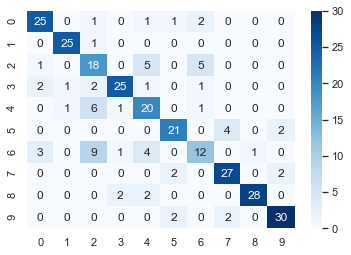

In [229]:
cm = confusion_matrix(y_test, predictions_autoencoder50)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

#### Check which classifier is the best for the appropriate parameter k of each case:

In [133]:
import pandas as pd
acc_data = [['pca10', acc_pca10], ['pca25', acc_pca25], ['pca50', acc_pca50],
            ['autoencoder10',acc_autoencoder10],['autoencoder25',acc_autoencoder25],
            ['autoencoder50',acc_autoencoder50]]

df_acc_data= pd.DataFrame(acc_data, columns = ['Method', 'Accuracy'])
df_acc_data

,Method,Accuracy
0,pca10,0.703333
1,pca25,0.683333
2,pca50,0.613333
3,autoencoder10,0.676667
4,autoencoder25,0.710000
5,autoencoder50,0.770000


We can see that for the dataset that was used the method autoencoder with M=50 dimensions the accuracy of KNN is the biggest(in test set).
* Note that: for each of the six datasets the parameter k was choosed in a way so that the KNN classifier be the best, so the k is not the same for each case. Above are the results for the best k we could choose.

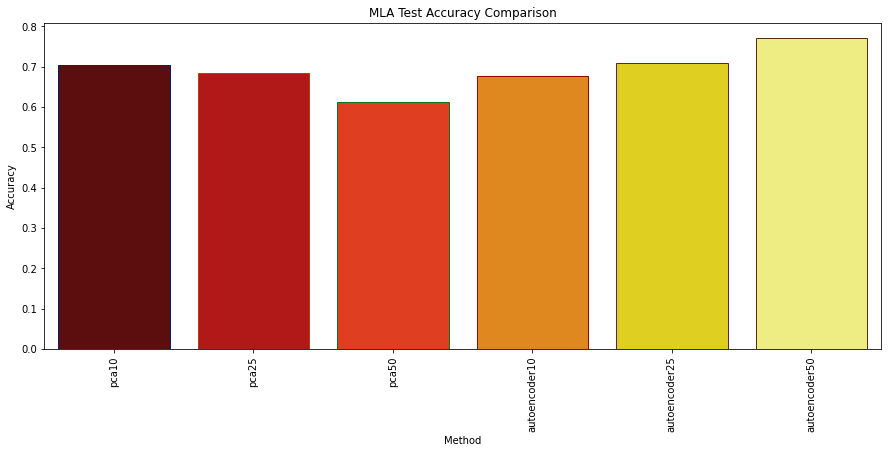

In [137]:
import seaborn as sns
plt.subplots(figsize=(15,6))
sns.barplot(x="Method", y="Accuracy",data=df_acc_data,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

### Question 3:
#### Use the best of the 6 datasets with decreased dimensions (in comparison with question 2γ). Classify the data of this dataset using K=10 clusters( one cluster per category) with KNN and GMM.

In question 2γ we found that the dataset which created with autoencoder method with M=50 dimensions gives the best accuracy in test set for KNN algorithm. So we keep this dataset.

In [141]:
print(encoded_imgs_50_train.shape)
print(encoded_imgs_50_test.shape)

(1200, 50)
(300, 50)


### k-means

In [218]:
data_autoencoder50=np.concatenate((encoded_imgs_50_train,encoded_imgs_50_test)) #merge data
labels_autoencoder50=np.concatenate((y_train,y_test))
print(data_autoencoder50.shape)
print(labels_autoencoder50.shape)

(1500, 50)
(1500,)


In [245]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
predicted_labels=kmeans.fit_predict(data_autoencoder50)

In [247]:
sklearn.metrics.normalized_mutual_info_score(labels_autoencoder50, predicted_labels) #metric normalized mutual info

0.5227712593407791

In [230]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels_autoencoder50, predicted_labels)

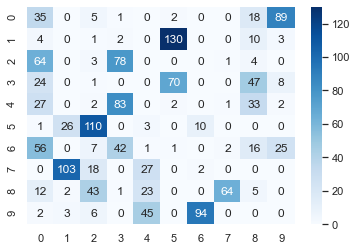

In [231]:
import seaborn as sns; sns.set()

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

### GMM

In [243]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=10, random_state=0)


In [248]:
predicted_labels=gm.fit_predict(data_autoencoder50)

In [249]:
sklearn.metrics.normalized_mutual_info_score(labels_autoencoder50, predicted_labels) #metric normalized mutual info

0.5447289307139109